<a href="https://colab.research.google.com/github/butchland/fastai_nb_explorations/blob/master/build_bear_classifier_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!curl -s https://course19.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [4]:
!pip install -Uqq fastcore
!pip install -Uqq fastai

In [ ]:
# from google.colab import drive
# drive.mount('/drive', force_remount=True)

In [5]:
!cp /content/drive/My\ Drive/fastai_v3/data/bears.tgz /content/data 
!tar -C /content/data -xzf /content/data/bears.tgz 

In [6]:
!mv /content/data/content/data/bears /content/data/.

In [7]:
!rm -rf /content/data/content

In [8]:
from fastai.vision.all import *

In [9]:
path = Path('/content/data/bears')

In [10]:
Path.BASE_PATH = path; path.ls()

(#6) [Path('black'),Path('urls_teddys.txt'),Path('urls_grizzly.txt'),Path('urls_black.txt'),Path('teddys'),Path('grizzly')]

In [13]:
datablock = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    splitter=RandomSplitter(seed=42),
    item_tfms=RandomResizedCrop(224, min_scale=0.8),
    batch_tfms=aug_transforms()
)

In [14]:
dls = datablock.dataloaders(path)

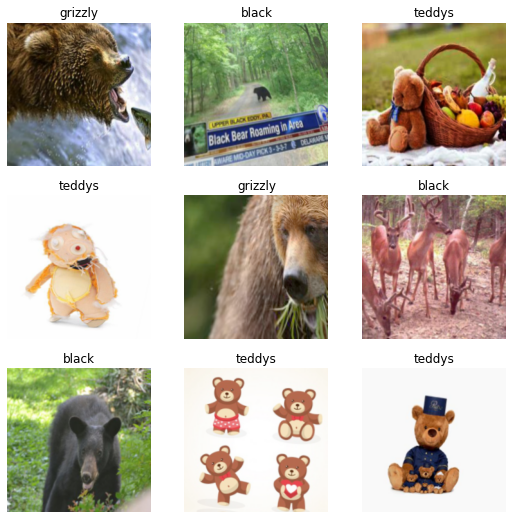

In [15]:
dls.show_batch()

In [16]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [17]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.793719,0.184547,0.953202,00:12


epoch,train_loss,valid_loss,accuracy,time
0,0.257483,0.157019,0.948276,00:12
1,0.195853,0.158237,0.948276,00:12
2,0.135775,0.167362,0.950739,00:12
3,0.094880,0.171122,0.958128,00:12


SuggestedLRs(lr_min=3.311311302240938e-05, lr_steep=9.12010818865383e-07)

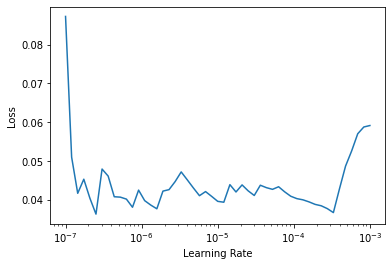

In [18]:
learn.save('stage-1')
learn.lr_find()

In [19]:
learn.fit_one_cycle(5, lr_max=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.043339,0.180360,0.958128,00:12
1,0.037063,0.167518,0.955665,00:12
2,0.034093,0.164763,0.955665,00:12
3,0.033264,0.166362,0.950739,00:13
4,0.027289,0.160911,0.958128,00:13


In [20]:
learn.export('bear-classifier.pkl')

In [21]:
!mkdir -p /content/drive/My\ Drive/fastai_v4/models/bears2
!cp /content/bear-classifier.pkl /content/drive/My\ Drive/fastai_v4/models/bears2/.
!cp /content/models/*.pth /content/drive/My\ Drive/fastai_v4/models/bears2/.